In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Any, Callable

In [43]:
def get_boxplot_outliers(
    data: np.ndarray,
    key: Callable[[Any], Any],
) -> np.ndarray:
    index_sorted = np.argsort(np.apply_along_axis(key, -1, data))
    data_sorted = np.sort(np.apply_along_axis(key, -1, data))
    q1 = data_sorted[int(data.shape[0] * 0.25)]
    q3 = data_sorted[int(data.shape[0] * 0.75)]
    e = (q3 - q1) * 1.5

    print(index_sorted)
    print(data_sorted)
    print(q1 - e)
    print(q3 + e)
    print(np.add(data_sorted < q1 - e, data_sorted > q3 + e))
    return np.sort(index_sorted[np.add(data_sorted < q1 - e, data_sorted > q3 + e)])

In [116]:
def visualize_distribution(
    axis: plt.Axes,
    data: np.ndarray,
    diagram_type: Any,
    path_to_save: str = None,
) -> None:
    if  not diagram_type in ("violin", "hist", "boxplot"):
        raise ValueError(f"Incorrect diagram type {diagram_type}")
    print(data.ndim)
    if data.ndim == 1:
        if diagram_type == "violin":
            axis.set_title("Distribution Violin", fontsize=17, fontweight="bold", c="dimgray")
            violin_parts = axis.violinplot(data, vert=False, showmedians=True)

            for body in violin_parts["bodies"]:
                body.set_facecolor("cornflowerblue")
                body.set_edgecolor("blue")

            for part in violin_parts:
                if part == "bodies":
                    continue
                
                violin_parts[part].set_edgecolor("cornflowerblue")
        elif diagram_type == "hist":
            axis.set_title("Distribution Hist", fontsize=17, fontweight="bold", c="dimgray")
            axis.hist(data, color="cornflowerblue")
        elif diagram_type == "boxplot":
            axis.set_title("Distribution Boxplot", fontsize=17, fontweight="bold", c="dimgray")
            axis.boxplot(data, vert=False)
    elif data.ndim == 2:
        pass
    else:
        pass

    if not path_to_save is None:
        figure = plt.figure()
        figure.add_axes(axis)
        figure.savefig(path_to_save, bbox_inches="tight")

1
1
1
[288 796 959 806 168 233 208 367 355 480 262  70 510 839 621 414 128 169
 617 309 940 620 408 894  39 250 315 671 751 317 101 282 426 247 835 820
  47 581 571 132 346 527 390 152 911 849 656 135 102 310 624 628  36 330
 363 851 963 192 802  17 800 598 595 582 639  86 799 575 412 975 280 163
 893 898 753 627 882 661 783 263  41  73 196 195 791 272 234  42 888 351
  20  82 291 555 603 180 522 481 696 172  30 369 773 236 541 525 752 792
  10 486 999 431 159 610 727 198 662  78 515 690 633 388 636 297 524 290
 131 463 788 673 591 139 570 456  51 461 787 477  84 700  76 227 987  54
 287 705 565 708 837 587 830 542 468 794 736  53 761 509 626 817 726 213
 984 293 216  98 497 320  48 148 775 447 433 314 840 602  64 476 475 859
 484   3 239 400  61 552 190 559 165 545 157 415 904 418 954 518 649 540
 772 709 174 554 857  80 618 269 516 428 245 734 698 735  33 256 385 279
 978 623 701 907 194 655 520 981 757 356 143 230 523 855 669 910 982 328
 588 549 432 824 710 177 716 919 682 732 116 

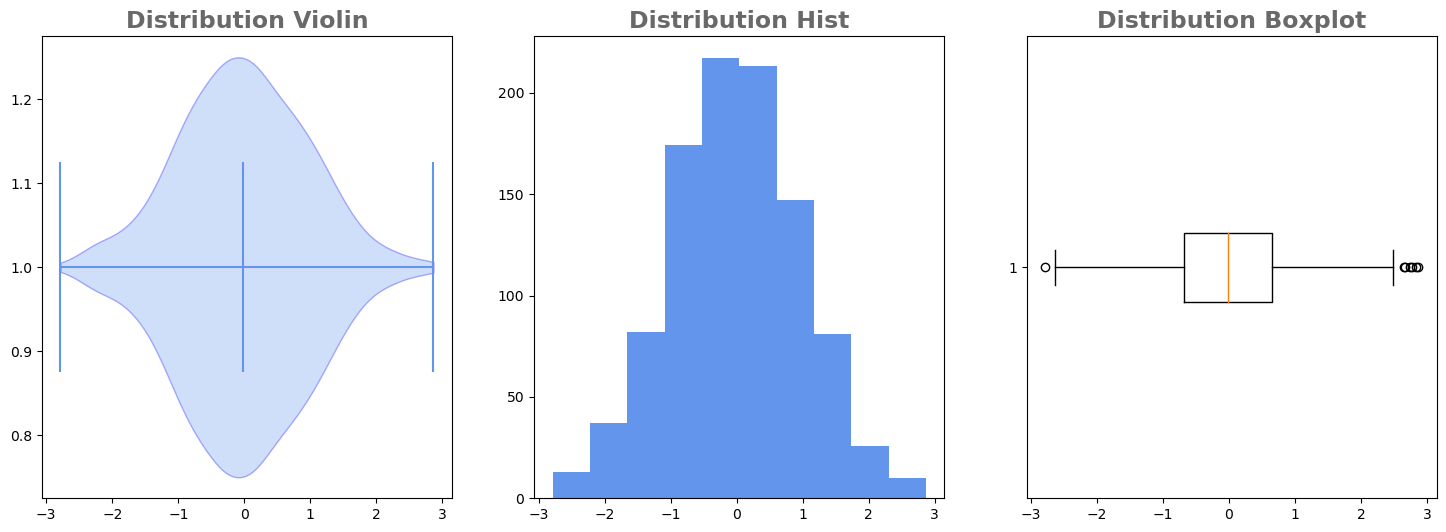

In [123]:
figure, axis = plt.subplots(1, 3, figsize=(18, 6))
data = np.random.normal(size=1000)

visualize_distribution(axis[0], data, "violin")
visualize_distribution(axis[1], data, "hist")
visualize_distribution(axis[2], data, "boxplot")

outliers = get_boxplot_outliers(data, lambda x: x)
mask = []
for i in range(data.shape[0]):
    if i in outliers:
        mask.append(True)
    else:
        mask.append(False)
#print(mask)
plt.show()

In [44]:
print(np.array([-1000, 10, 11, 12, 13, 14, 15, 16, 17, 1000]))
print(get_boxplot_outliers(np.array([-1000, 10, 11, 12, 13, 14, 15, 16, 17, 1000]), lambda x: x*2))

[-1000    10    11    12    13    14    15    16    17  1000]
[0 1 2 3 4 5 6 7 8 9]
[-2000    20    22    24    26    28    30    32    34  2000]
7.0
47.0
[ True False False False False False False False False  True]
[0 9]
